# Simulació


- La realitat sol estar formada per sistemes complexos
- Els sistemes senzills es poden modelitzar analíticament
- Els més complexos pot caldre simular-los numèricament per estudiar el seu comportament.
- Els sistemes els podem classificar amb tres categories:
    - Estàtic - Dinàmic
    - Deterministic - Estocàstic
    - Continus - Discret
- Per estudiar el comportament de sistemes discrets, dinàmics i estocàstics farem servir simulacions d'esdeveniments discrets (DES)

## Simulació d'esdeveniments discrets (DES)

- Rellotge de simulació
    - Marca l'instant de tir de cada esdeveniment
- Entitats
    - Atributs
    - Els estats de les entitats conformen l'estat del sistema
    - Processos
        - Generen canvis d'estat
- Esdeveniments
    - Canvis d'estat del sistema
- Recursos
    - Alguns processos generen o consumeixen recursos
- Cues
    - La limitació de recursos generen cues

### Rellotge de simulació

- Se solen donar dues implementacions: fixed-increment i next-event
    - Fixed-increment: s'actualitza l'estat a cada increment processant l'esdeveniment del darrer increment
    - Next-event: es registra el temps quan ocorreran esdeveniments

- Cada esdeveniment inicia un o diversos processos
- Aquests processos modifiquen el sistema i introdueixen esdeveniments

### Estructura de la SED (DES)

- Inicialització

    - Init clock
    - Init events
    - Init system
        - Init entities
        - Init statistics

 - Loop
     - Trigger next event
     - Process event
     - Update system
     - Update statistics
     - Generate future events

 - Report

## Cua FIFO

- Tenim un servei de venda per taquilla que triga una mitjana de 10s en atendre a cada client
- Tenim un fluix d'arribada d'un client cada 8s
- Assumim que la cua està buida per t=0

In [ ]:
%pip install simpy

In [ ]:
import simpy
import numpy as np
import pandas as pd

In [ ]:
def venda(env, taquilla, cua):
    """
    Simula el temps de venda
    """
    with taquilla.request() as req:
        yield req
        temps = np.random.exponential(10)
        print("venda", env.now, "trigarà", temps)
        yield env.timeout(temps)
        cua.loc[env.now] = cua.iloc[-1].pers - 1
        print(env.now, "Següent!")

In [ ]:
def simulacio(env, n_taquilles, cua):
    """
    Inicialitza la simulació
    """
    # La taquilla és un recurs limitat
    taquilla = simpy.Resource(env, capacity=n_taquilles)

    # La cua comença buida
    cua.loc[0] = 0

    # Comença l'arribada de clients
    while True:
        temps = np.random.exponential(8)
        yield env.timeout(temps)
        print("arribat", env.now)
        cua.loc[env.now] = cua.iloc[-1].pers + 1
        v = venda(env, taquilla, cua)
        env.process(v)


### Llaç de simulació

In [ ]:
env = simpy.Environment()
n_taquilles = 2

# Guardem l'evolució de la cua
cua = pd.DataFrame(columns=['pers'])

env.process(simulacio(env, n_taquilles, cua))
env.run(until=300)

arribat 6.929899520204829
venda 6.929899520204829 trigarà 17.776613170660987
24.706512690865814 Seguent!
arribat 29.56977730092202
venda 29.56977730092202 trigarà 2.2110188738024297
arribat 31.078141424431365
venda 31.078141424431365 trigarà 6.836505240150512
31.78079617472445 Seguent!
37.91464666458188 Seguent!
arribat 63.93124979943414
venda 63.93124979943414 trigarà 49.4477357772555
arribat 73.21886866356668
venda 73.21886866356668 trigarà 19.736120213666773
arribat 89.8627135295068
92.95498887723346 Seguent!
venda 92.95498887723346 trigarà 1.9528917097280276
94.90788058696148 Seguent!
arribat 101.20625494588198
venda 101.20625494588198 trigarà 1.9318819936623524
103.13813693954434 Seguent!
113.37898557668964 Seguent!
arribat 114.10202224478141
venda 114.10202224478141 trigarà 36.50102192724582
arribat 118.31079975984693
venda 118.31079975984693 trigarà 2.725389926252518
121.03618968609945 Seguent!
arribat 136.1510006420132
venda 136.1510006420132 trigarà 13.593084431204218
arribat 

### Report

In [ ]:
cua.head(10)

,pers
0.000000,0
11.066690,1
11.253670,2
15.285012,3
24.823990,2
26.988114,3
31.060139,2
43.854288,1
53.839443,2
59.385668,1


<Axes: >

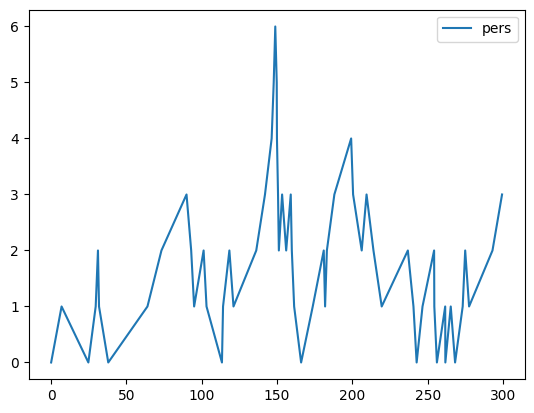

In [ ]:
cua.plot()

Per estimar el rendiment del nostre sistema podem mesurar diferents paràmetres

- Quina és la llargària mitjana de la cua?
- Quin és el temps mitjà fent cua?
- Quin percentatge del temps estan les taquilles ocupades?


- La simulació és una composició d'esdeveniments estocàstics
    - El resultat té una component aleatòria
    - Cal repetir la simulació prou cops per obtenir un resultat estable
    - La distribució de resultats ens pot donar molta informació

## Altres exemples

- [Transport](https://colab.research.google.com/github/vitostamatti/discrete-event-simulation-simpy/blob/main/notebooks/02-transportation_examples.ipynb)
- [Fluix d'entitats](https://colab.research.google.com/github/vitostamatti/discrete-event-simulation-simpy/blob/main/notebooks/03-entity_flow_examples.ipynb)
- [Benzinera](https://colab.research.google.com/github/vitostamatti/discrete-event-simulation-simpy/blob/main/notebooks/04-fuel_station_example.ipynb)

# Bibliografia


- <a id='bib_Law'></a> Law, Averill M., **2015**. *Simulation modeling and analysis*. Mcgraw-Hill.
- <a id='bib_Law'></a> Cantot, Pascal, **2011**. *Simulation and Modeling of Systems of Systems*. John Wiley & Sons.
- <a id='bib_Law'></a> Kroese, Dirk P., **2011**. *Handbook of Monte Carlo Methods*. John Wiley & Sons.

# Referències

- [SimPy](https://simpy.readthedocs.io)
- [Discrete Event Simulation with Python](https://github.com/vitostamatti/discrete-event-simulation-python/)

Copyright (C) 2025 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: https://www.gnu.org/graphics/gfdl-logo.svg
[GPL3]: https://www.gnu.org/graphics/gplv3-or-later.svg